# Episode Emotions: Recommending Avatar Episodes By Emotion Analysis

This project is an episode recommender system that leverages the DistilRoBERTa-base emotion model to analyze and categorize emotions in the dialogue of Avatar the Last Airbender scripts. The system processes each line of the script, assigning emotion categories and calculating corresponding emotion scores. These scores represent the emotional tone of each episode.

To recommend episodes, the project uses Euclidean distance to measure the similarity between the emotion scores of different episodes. By comparing the emotional profiles, the system can suggest episodes with similar emotional content to the ones a user prefers.

The dataset is from Kaggle: https://www.kaggle.com/datasets/ekrembayar/avatar-the-last-air-bender

In [198]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

model = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

In [ ]:
avatar = pd.read_csv('/content/avatar.csv', encoding='unicode_escape')
avatar = avatar.set_index("chapter").drop(columns = ['Unnamed: 0'])
avatar = avatar[avatar.get('character_words').notnull()]
avatar

,id,book,book_num,chapter_num,character,full_text,character_words,writer,director,imdb_rating
chapter,,,,,,,,,,
The Boy in the Iceberg,1,Water,1,1,Katara,Water. Earth. Fire. Air. My grandmother used t...,Water. Earth. Fire. Air. My grandmother used t...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
The Boy in the Iceberg,2,Water,1,1,Scene Description,"As the title card fades, the scene opens onto ...",NaN,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
The Boy in the Iceberg,3,Water,1,1,Sokka,It's not getting away from me this time. [Clos...,It's not getting away from me this time. Watc...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
The Boy in the Iceberg,4,Water,1,1,Scene Description,"The shot pans quickly from the boy to Katara, ...",NaN,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
The Boy in the Iceberg,5,Water,1,1,Katara,"[Happily surprised.] Sokka, look!","Sokka, look!","<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
...,...,...,...,...,...,...,...,...,...,...
"Sozin's Comet, Part 4: Avatar Aang",13381,Fire,3,21,Suki,And why did you paint me firebending?,And why did you paint me firebending?,"Aaron Ehasz, Michael Dante DiMartino, Bryan Ko...",Joaquim Dos Santos,9.8
"Sozin's Comet, Part 4: Avatar Aang",13382,Fire,3,21,Sokka,I thought it looked more exciting that way. [M...,I thought it looked more exciting that way. O...,"Aaron Ehasz, Michael Dante DiMartino, Bryan Ko...",Joaquim Dos Santos,9.8
"Sozin's Comet, Part 4: Avatar Aang",13383,Fire,3,21,Iroh,"[Points at painting.] Hey, my belly's not that...","Hey, my belly's not that big anymore. I've rea...","Aaron Ehasz, Michael Dante DiMartino, Bryan Ko...",Joaquim Dos Santos,9.8


In [180]:
avatar_first = avatar[(avatar.get('book_num') == 1)]
s1_texts = avatar_first["character_words"].values.tolist()
s1_emotions = model(s1_texts)

In [181]:
emotions_df_s1 = pd.DataFrame().assign(text = avatar_first["character_words"], rating = avatar_first["imdb_rating"])
emotions_df_s1["emotion_label"] = [d["label"] for d in s1_emotions]
emotions_df_s1["emotion_score"] = [d["score"] for d in s1_emotions]
emotions_df_s1

,text,rating,emotion_label,emotion_score
chapter,,,,
The Boy in the Iceberg,Water. Earth. Fire. Air. My grandmother used t...,8.1,neutral,0.475815
The Boy in the Iceberg,It's not getting away from me this time. Watc...,8.1,neutral,0.900327
The Boy in the Iceberg,"Sokka, look!",8.1,anger,0.390710
The Boy in the Iceberg,"Sshh! Katara, you're going to scare it away. ...",8.1,fear,0.569813
The Boy in the Iceberg,"But, Sokka! I caught one!",8.1,surprise,0.698962
...,...,...,...,...
"The Siege of the North, Part 2",I'm tired.,NaN,sadness,0.909213
"The Siege of the North, Part 2",Then you should rest. A man needs his rest.,NaN,neutral,0.686939
"The Siege of the North, Part 2","You too, Momo.",NaN,neutral,0.725917


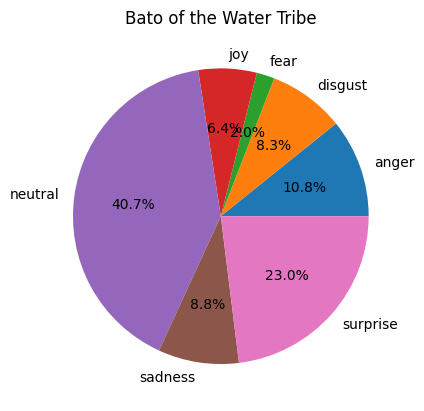

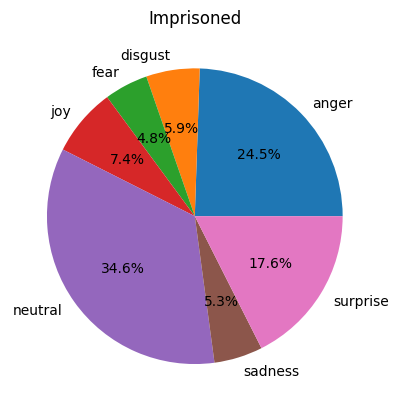

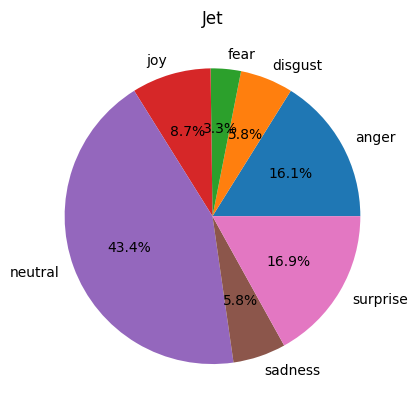

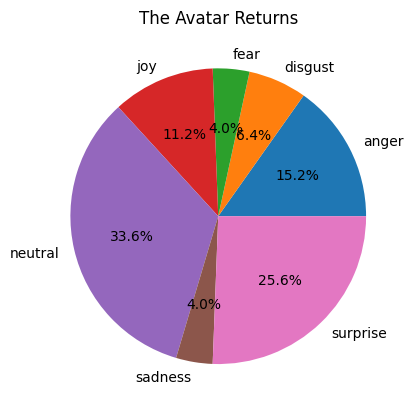

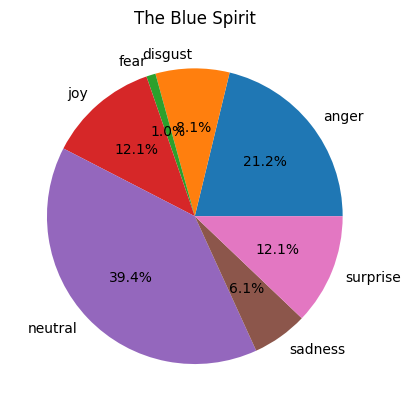

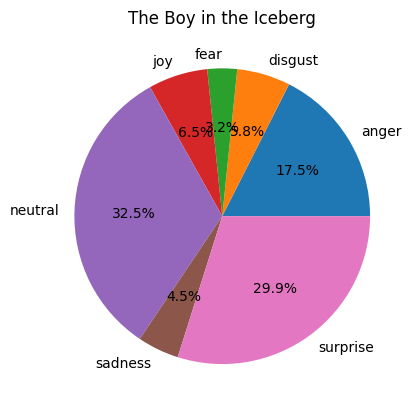

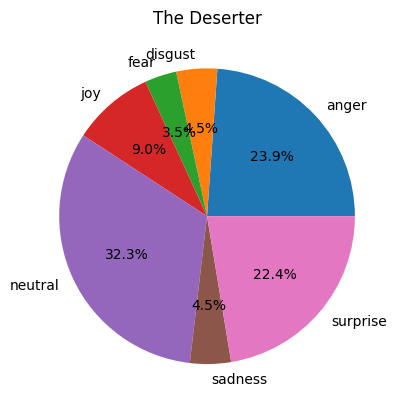

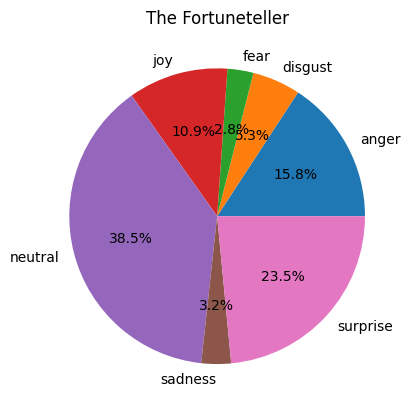

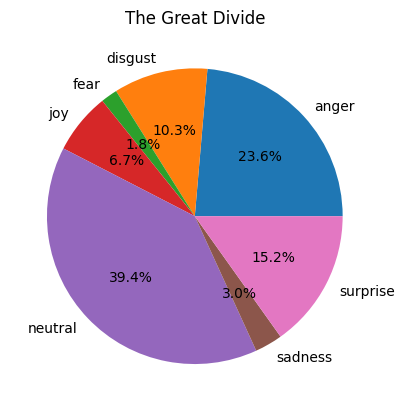

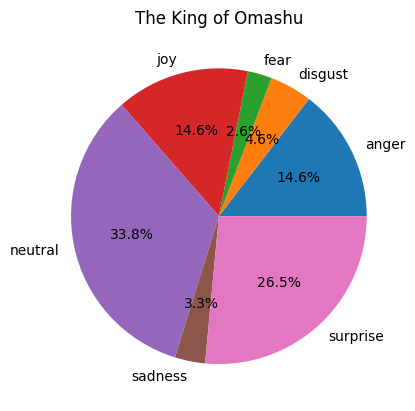

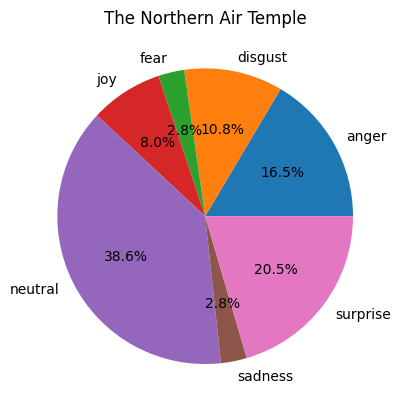

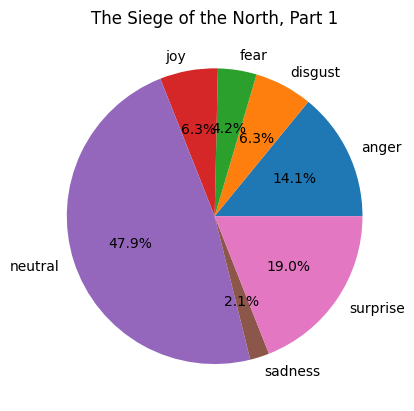

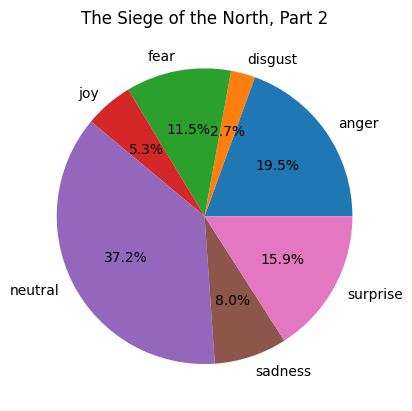

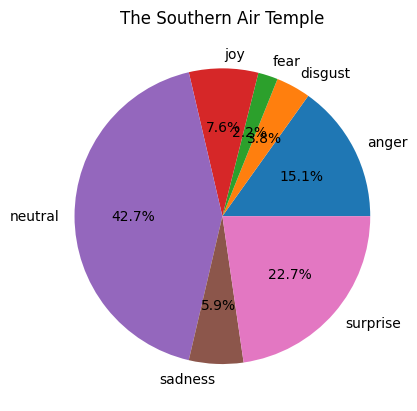

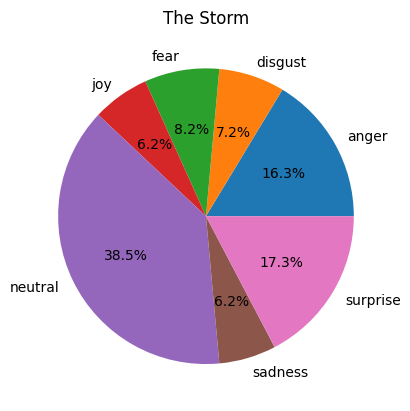

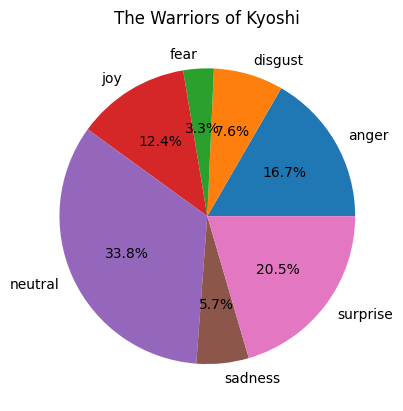

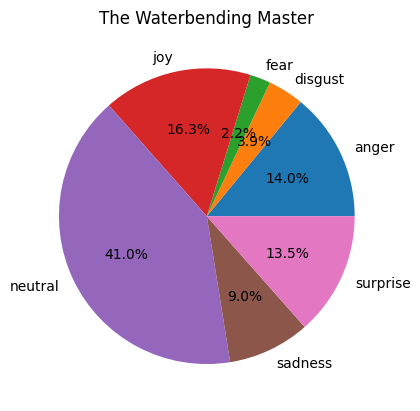

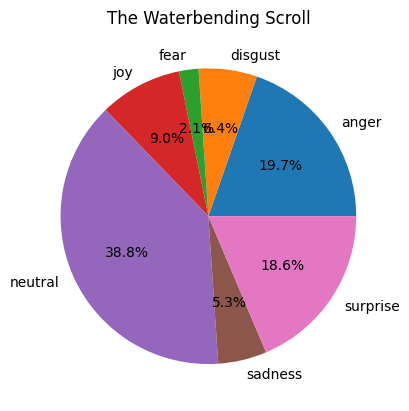

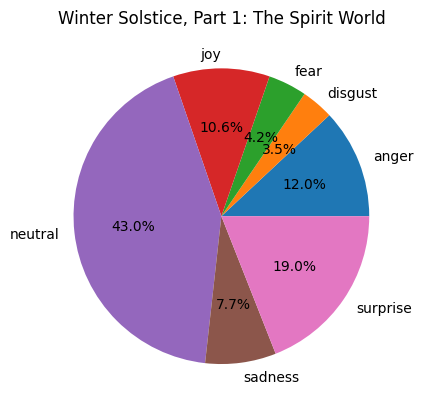

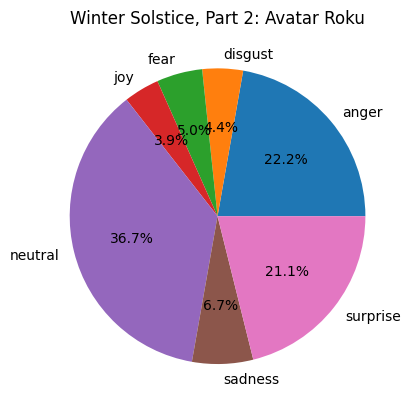

In [178]:
episodes = emotions_df_s1.groupby('chapter').count().index.values.tolist()
for episode in episodes:
  this_ep = emotions_df_s1[emotions_df_s1.index == episode]
  this_ep = this_ep.groupby('emotion_label').count()
  plt.pie(this_ep.get('emotion_score'), labels = this_ep.index, autopct='%1.1f%%')
  plt.title(episode)
  plt.show()

## ALL EMOTIONS (will take a while to load)

In [182]:
all_texts = avatar["character_words"].values.tolist()
all_emotions = model(all_texts)

In [185]:
emotions_df = pd.DataFrame().assign(text = avatar["character_words"], rating = avatar["imdb_rating"])
emotions_df["emotion_label"] = [d["label"] for d in all_emotions]
emotions_df["emotion_score"] = [d["score"] for d in all_emotions]
emotions_df

,text,rating,emotion_label,emotion_score
chapter,,,,
The Boy in the Iceberg,Water. Earth. Fire. Air. My grandmother used t...,8.1,neutral,0.475815
The Boy in the Iceberg,It's not getting away from me this time. Watc...,8.1,neutral,0.900327
The Boy in the Iceberg,"Sokka, look!",8.1,anger,0.390710
The Boy in the Iceberg,"Sshh! Katara, you're going to scare it away. ...",8.1,fear,0.569813
The Boy in the Iceberg,"But, Sokka! I caught one!",8.1,surprise,0.698962
...,...,...,...,...
"Sozin's Comet, Part 4: Avatar Aang",I look like a man.,9.8,disgust,0.685285
"Sozin's Comet, Part 4: Avatar Aang",And why did you paint me firebending?,9.8,surprise,0.455786
"Sozin's Comet, Part 4: Avatar Aang",I thought it looked more exciting that way. O...,9.8,surprise,0.608036


We're going to calculate the similarity between episodes using the Euclidean distance between two points in a 7-dimensional space.
First step is to calculate the mean of each emotion per episode.

In [186]:
def get_emotion_values(title):
  # emotions order: anger, disgust, fear, joy, netural, sadness, surprise
  this_ep = emotions_df[emotions_df.index == title].get(['emotion_label', 'emotion_score'])
  return np.array(this_ep.groupby('emotion_label').mean())
get_emotion_values('The Warriors of Kyoshi')

array([[0.61808972],
       [0.54026713],
       [0.56679654],
       [0.71795492],
       [0.69195214],
       [0.64941291],
       [0.66316504]])

In [188]:
episodes = emotions_df.groupby(['chapter', 'rating']).count().reset_index().set_index('chapter').get(['rating'])
episodes

,rating
chapter,
Appa's Lost Days,8.8
Avatar Day,7.5
Bato of the Water Tribe,7.9
Bitter Work,8.6
City of Walls and Secrets,8.7
Imprisoned,8.0
Jet,7.8
Lake Laogai,9.1
Nightmares and Daydreams,7.8


In [189]:
def calculate_similarity(ep_1, ep_2):
    answer = 0.0
    for i in range(len(ep_1)):
        answer += (ep_2[i] - ep_1[i])**2

    return (answer)**(1/2)

kyoshi = get_emotion_values('The Warriors of Kyoshi')
blue = get_emotion_values('The Blue Spirit')
fortune = get_emotion_values('The Fortuneteller')
calculate_similarity(kyoshi, fortune)

array([0.13621663])

In [193]:
def calculate_similarity_for_all(title):
    this_ep = get_emotion_values(title)
    similarity_scores = np.array([])

    for title in episodes.index.values.tolist():
        comparison_ep = get_emotion_values(title)
        similarity_scores = np.append(similarity_scores, calculate_similarity(this_ep, comparison_ep))

    return similarity_scores

In [194]:
def select_top_recommendations(similarity_scores, n):
    top_match = episodes.assign(Similarity = similarity_scores)
    return top_match.sort_values(by='Similarity').iloc[0:n].drop(columns = 'Similarity')
select_top_recommendations(calculate_similarity_for_all('The Warriors of Kyoshi'), 5)

,rating
chapter,
The Warriors of Kyoshi,8.2
"The Boiling Rock, Part 1",8.7
The Southern Raiders,8.9
"Winter Solstice, Part 2: Avatar Roku",8.9
The Southern Air Temple,8.5


# Avatar the Last Airbender Episode Recommender
Input an ATLA episode name and number of episode recommendations you would like.

In [196]:
episode = input("Enter ATLA episode: ")
n = int(input("Enter number of recommendations: "))
select_top_recommendations(calculate_similarity_for_all(episode), n)

Enter ATLA episode: Imprisoned
Enter number of recommendations:10


,rating
chapter,
Imprisoned,8.0
The Southern Raiders,8.9
"The Boiling Rock, Part 1",8.7
The Warriors of Kyoshi,8.2
The Beach,8.5
The King of Omashu,8.2
The Awakening,8.7
The Library,8.8
The Blind Bandit,9.2
